# Assignment 3(due on 11/22)

## Student:许继文（12332330），Gtihub：JIWEN1XU
## 批改人：张鹏


## 得分：55/60

In [2]:
# import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# 1
SST = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc",engine='netcdf4')
SST

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [3]:
# the seasonal change of temperature is calculated at (5N-5S, 170W-120W)
group_data = SST.sst.sel(lon=slice(120,170),lat=slice(-5,5)).groupby('time.month')
sst_clim = group_data.mean()
sst_clim

<xarray.DataArray 'sst' (month: 12, lat: 5, lon: 26)>
array([[[29.028156, 29.124018, 29.130487, ..., 29.458986, 29.40671 ,
         29.358635],
        [29.027426, 29.153624, 29.129362, ..., 29.291643, 29.204933,
         29.120565],
        [28.849007, 28.912628, 28.852278, ..., 29.110067, 28.99955 ,
         28.881413],
        [28.612465, 28.634708, 28.546515, ..., 29.011509, 28.898874,
         28.79206 ],
        [28.40417 , 28.447857, 28.392477, ..., 28.926332, 28.847929,
         28.770119]],

       [[28.825596, 28.930664, 28.940992, ..., 29.35216 , 29.293056,
         29.238314],
        [28.833675, 28.988573, 28.985886, ..., 29.194006, 29.0958  ,
         28.999252],
        [28.68234 , 28.760672, 28.715094, ..., 29.009357, 28.88335 ,
         28.75082 ],
        [28.4706  , 28.487507, 28.394753, ..., 28.928986, 28.801754,
         28.684416],
        [28.25052 , 28.287918, 28.223717, ..., 28.879599, 28.797909,
...
         29.634012],
        [29.52841 , 29.521248, 29.439075, ..., 29.461407, 29.411896,
         29.378262],
        [29.469206, 29.49123 , 29.416918, ..., 29.265162, 29.185635,
         29.129591],
        [29.35844 , 29.388475, 29.340836, ..., 29.25499 , 29.164148,
         29.110823],
        [29.258398, 29.272776, 29.248367, ..., 29.318436, 29.257198,
         29.215263]],

       [[29.398111, 29.451107, 29.452528, ..., 29.62688 , 29.598337,
         29.573372],
        [29.383438, 29.455273, 29.41713 , ..., 29.432829, 29.369019,
         29.315294],
        [29.23622 , 29.28212 , 29.224049, ..., 29.233976, 29.140806,
         29.057495],
        [29.042618, 29.06313 , 28.99859 , ..., 29.160395, 29.058783,
         28.97982 ],
        [28.894953, 28.918709, 28.872938, ..., 29.127762, 29.056019,
         28.993029]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 120.0 122.0 124.0 126.0 ... 164.0 166.0 168.0 170.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

In [4]:
# deseasonalize and get outliers
sst_anom=group_data-group_data.mean(dim='time')
sst_anom.sel(lon=slice(120,170),lat=slice(-5,5))
# the data were processed to obtain outliers on a three-month scale
resample_obj = sst_anom.resample(time="3M")
ds_anom_resample = resample_obj.mean(dim="time")
ds_anom_resample

<xarray.DataArray 'sst' (time: 229, lat: 5, lon: 26)>
array([[[-0.4533596 , -0.43008804, -0.3652172 , ..., -0.5904255 ,
         -0.51613617, -0.5157356 ],
        [-0.14541245, -0.14106178, -0.20046997, ..., -0.60107803,
         -0.5806999 , -0.5200424 ],
        [ 0.03437614, -0.01860619, -0.1291542 , ..., -0.61279106,
         -0.5868416 , -0.55138206],
        [-0.03416824, -0.07881355, -0.139431  , ..., -0.5768242 ,
         -0.56368065, -0.5451031 ],
        [-0.11306   , -0.14630127, -0.18651962, ..., -0.47527504,
         -0.48386002, -0.49680328]],

       [[-0.29540953, -0.25229773, -0.21316402, ..., -0.6501789 ,
         -0.5796814 , -0.58689374],
        [-0.18128014, -0.12417793, -0.13654137, ..., -0.6904233 ,
         -0.68461037, -0.64244586],
        [-0.09715843, -0.08390108, -0.10546494, ..., -0.7069289 ,
         -0.6881733 , -0.6722056 ],
        [-0.18694179, -0.16128285, -0.128987  , ..., -0.64433545,
         -0.62889546, -0.6225446 ],
        [-0.27703476, -0.2525959 , -0.20511119, ..., -0.517519  ,
...
          0.51037025,  0.44631258],
        [ 0.31214967,  0.4855779 ,  0.7164224 , ...,  0.4436461 ,
          0.3200194 ,  0.2053426 ],
        [ 0.39565277,  0.5145791 ,  0.7320716 , ...,  0.39797845,
          0.23362541,  0.08429018],
        [ 0.44386673,  0.44989267,  0.5983505 , ...,  0.5368557 ,
          0.3789749 ,  0.21928024],
        [ 0.42669234,  0.40143776,  0.4725081 , ...,  0.714798  ,
          0.5879669 ,  0.46769652]],

       [[ 0.32543087,  0.3451271 ,  0.4029932 , ...,  0.51263714,
          0.4383192 ,  0.36778736],
        [ 0.42484474,  0.5078449 ,  0.57851505, ...,  0.34471035,
          0.22703075,  0.10994244],
        [ 0.5032301 ,  0.5828867 ,  0.66394806, ...,  0.27353382,
          0.13096333, -0.00620747],
        [ 0.46020794,  0.49208736,  0.58321095, ...,  0.37838078,
          0.25306892,  0.11438084],
        [ 0.3544016 ,  0.36249638,  0.44186687, ...,  0.5236778 ,
          0.4169016 ,  0.31012917]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 120.0 122.0 124.0 126.0 ... 164.0 166.0 168.0 170.0
  * time     (time) datetime64[ns] 1960-01-31 1960-04-30 ... 2017-01-31

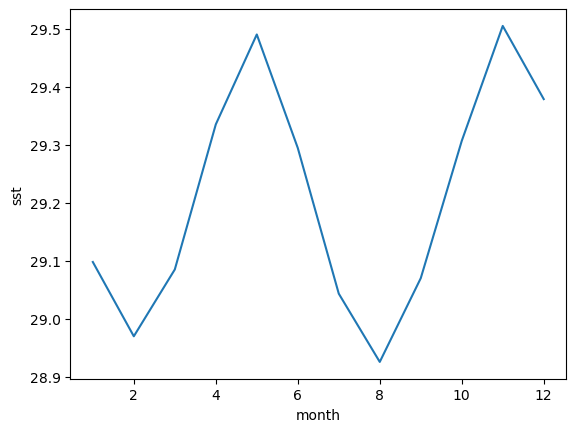

In [5]:
# 1.2
# visualize seasonal changes
sst_clim.mean(dim=['lat','lon']).plot()

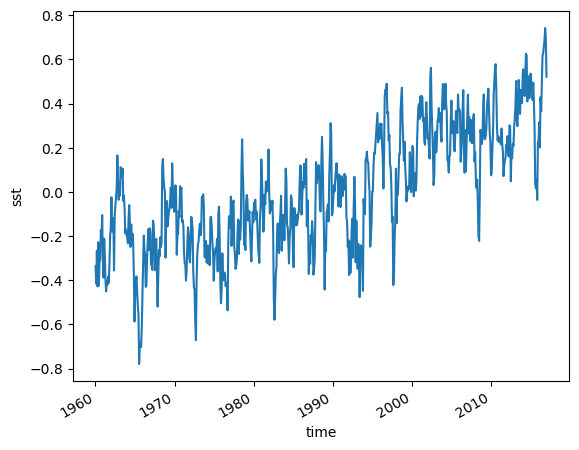

In [6]:
# visualize the de-seasonality change
sst_anom.mean(dim=['lat','lon']).plot()

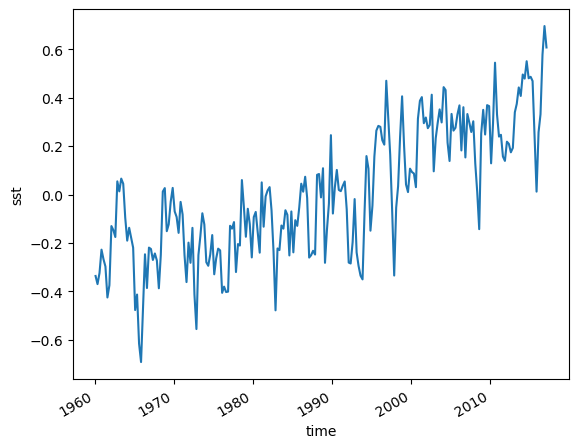

In [7]:
# visualization of outliers on a three-month scale
ds_anom_resample.mean(dim=['lat','lon']).plot()

In [8]:
ds_anom_resample_m=ds_anom_resample.mean(dim=['lat','lon'])
ds_anom_resample_m

<xarray.DataArray 'sst' (time: 229)>
array([-0.33638978, -0.37003502, -0.3239999 , -0.22765496, -0.26742154,
       -0.29706082, -0.42516705, -0.3743719 , -0.13013509, -0.14662217,
       -0.17526981,  0.05451763,  0.01313595,  0.06591826,  0.04469279,
       -0.09537051, -0.19031097, -0.13719894, -0.1779783 , -0.21954633,
       -0.47708625, -0.41306534, -0.61572886, -0.6919386 , -0.46526185,
       -0.24677637, -0.38609752, -0.21915027, -0.22480527, -0.2702479 ,
       -0.2433737 , -0.27216244, -0.38718328, -0.24891156,  0.01236948,
        0.02674307, -0.1512471 , -0.12314105, -0.02989539,  0.02746935,
       -0.06977199, -0.09244606, -0.15824564, -0.03030802, -0.08215355,
       -0.24998821, -0.36153477, -0.19859119, -0.2819085 , -0.13750277,
       -0.41236964, -0.5556232 , -0.2498695 , -0.1719188 , -0.07733187,
       -0.12359207, -0.27969757, -0.29421753, -0.2476332 , -0.16733189,
       -0.32939062, -0.26420408, -0.22348669, -0.23065028, -0.4060981 ,
       -0.38037926, -0.402714  , -0.4010484 , -0.12891535, -0.1408334 ,
       -0.11381914, -0.32007325, -0.2045178 , -0.21054327,  0.05988208,
       -0.05048161, -0.17434482, -0.05864822, -0.12214249, -0.25969198,
       -0.09298059, -0.07176815, -0.1562431 , -0.24005908,  0.05026476,
       -0.13279352, -0.00744956,  0.01719128,  0.03076849, -0.06558541,
       -0.2355391 , -0.47826445, -0.22260715, -0.22947134, -0.12784567,
       -0.14085631, -0.06479608, -0.08387943, -0.2515224 , -0.06982005,
...
       -0.19591552, -0.01864021, -0.23917682, -0.29464397, -0.33528358,
       -0.35045642, -0.07411855,  0.15897055,  0.10697694, -0.14921309,
       -0.04572915,  0.1568192 ,  0.2641609 ,  0.28375474,  0.2797301 ,
        0.22447583,  0.20625184,  0.4701414 ,  0.31612307,  0.16429943,
       -0.07111615, -0.33452275, -0.05399809,  0.03474595,  0.23891602,
        0.40586895,  0.20059861,  0.04168706,  0.01015314,  0.10702178,
        0.09294897,  0.0868701 ,  0.03048421,  0.31326863,  0.38727093,
        0.40259364,  0.29476655,  0.3183891 ,  0.27422825,  0.28749415,
        0.4125064 ,  0.09602283,  0.23268497,  0.294751  ,  0.35175908,
        0.2979943 ,  0.4437765 ,  0.4319937 ,  0.21467721,  0.13865069,
        0.33312672,  0.26419055,  0.2758488 ,  0.33165234,  0.36844757,
        0.18227148,  0.3608378 ,  0.15332824,  0.33264446,  0.2980027 ,
        0.2584041 ,  0.30271897,  0.12783696,  0.01041856, -0.14296326,
        0.25190043,  0.3500043 ,  0.2480731 ,  0.36936525,  0.36543158,
        0.12898877,  0.29491633,  0.54474586,  0.3310301 ,  0.23948544,
        0.24682468,  0.15716833,  0.13909237,  0.21837936,  0.209491  ,
        0.17454773,  0.19300571,  0.34000415,  0.3749026 ,  0.442632  ,
        0.40747023,  0.4960373 ,  0.4790274 ,  0.5508579 ,  0.48036876,
        0.48651356,  0.469067  ,  0.24312   ,  0.01210874,  0.25750467,
        0.33146283,  0.57795835,  0.6961747 ,  0.6076585 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-31 1960-04-30 ... 2017-01-31

In [9]:
df=pd.DataFrame(ds_anom_resample_m.where(ds_anom_resample_m>=0),columns=['anom>=0'])
df['anom<0']=pd.DataFrame(ds_anom_resample_m.where(ds_anom_resample_m<0))
df['date'] = pd.DataFrame(ds_anom_resample_m.time)
df.set_index('date',inplace=True)
df

,anom>=0,anom<0
date,,
1960-01-31,NaN,-0.336390
1960-04-30,NaN,-0.370035
1960-07-31,NaN,-0.324000
1960-10-31,NaN,-0.227655
1961-01-31,NaN,-0.267422
...,...,...
2016-01-31,0.257505,NaN
2016-04-30,0.331463,NaN
2016-07-31,0.577958,NaN


Text(0.5, 1.0, 'SST Anomaly in Nino 3.4 Region')

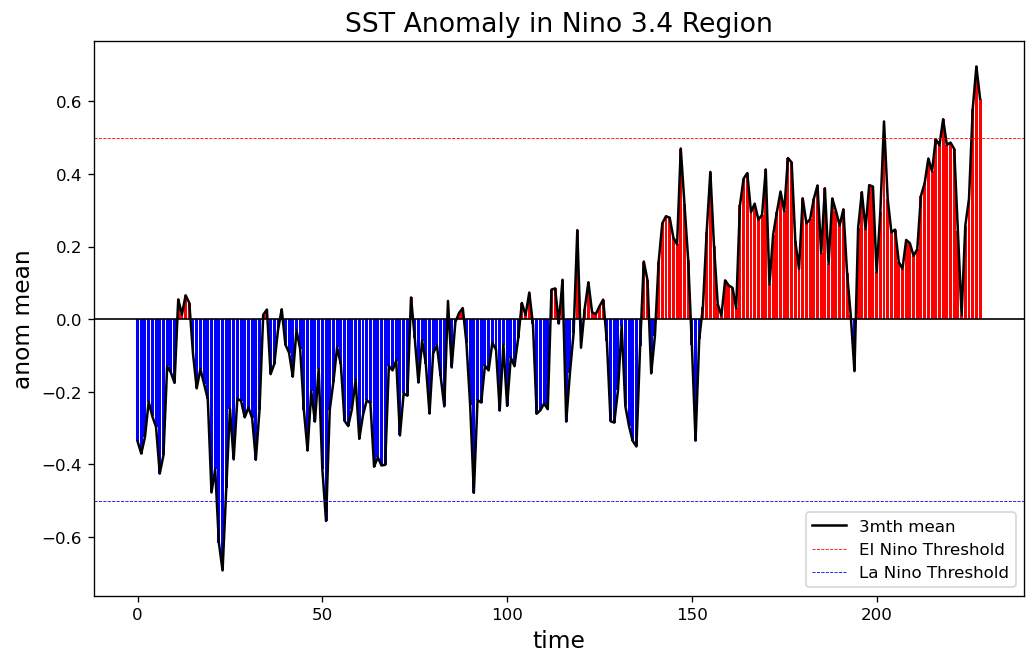

In [10]:
# color according to positive and negative
plt.figure(figsize=(10,6),dpi=120)
plt.bar(np.arange(len(df['anom>=0'])),df['anom>=0'],color="red")
plt.bar(np.arange(len(df['anom<0'])),df['anom<0'],color="blue")
plt.plot(ds_anom_resample_m,'k-')

plt.axhline(y=0.5,color="red",linestyle='--',linewidth=0.5)
plt.axhline(y=-0.5,color="blue",linestyle='--',linewidth=0.5)
plt.axhline(y=0,color="black",linestyle='-',linewidth=1)
plt.legend(labels=['3mth mean','EI Nino Threshold','La Nino Threshold'],loc=4)
plt.ylabel('anom mean',fontsize=14)
plt.xlabel('time',fontsize=14)
plt.title('SST Anomaly in Nino 3.4 Region',fontsize=16)

### 第一题代码运行正常，可以输出图片，有报告分析输出结果有部错误。在区域选择时候有问题，该数据集的经度范围是0-360，对应的170w-120w应该是lon=slice（190-240），1.2的出图跟目标图片有些差距，应该是跟区域选择有关，请认真检查。

### 得分：18/20
### --------------------------------------------------------------------------------------------

## 2. Earth’s energy budget

In [6]:
# 2
TOA = xr.open_dataset("../CERES_EBAF-TOA_200003-201701.nc",engine='netcdf4')
TOA

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

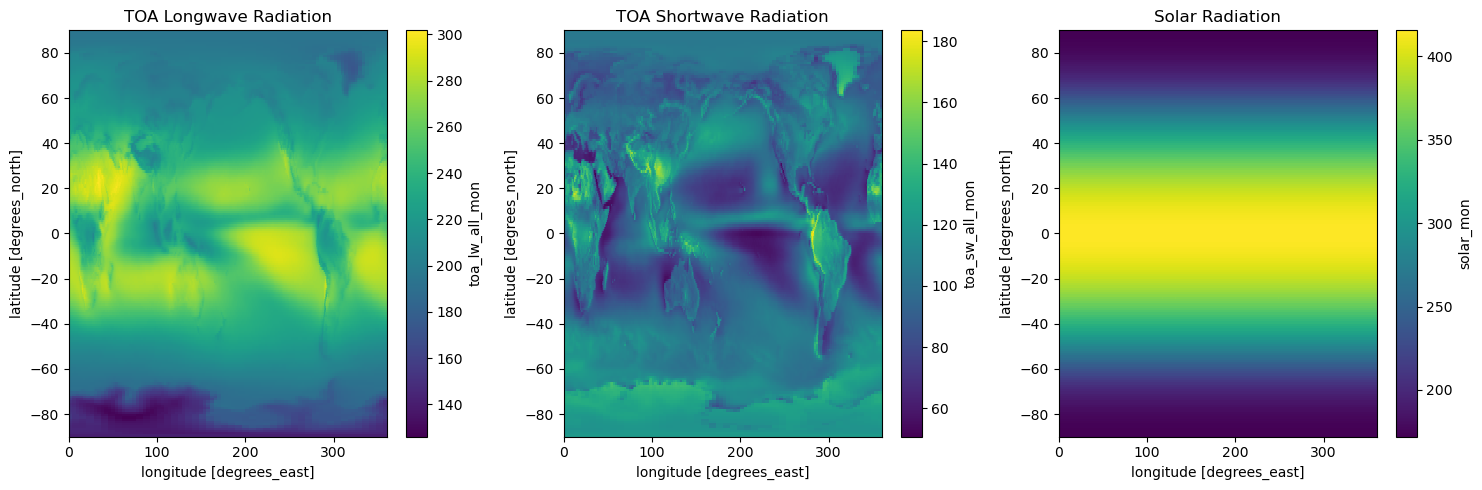

In [7]:
# 2.1
toa_sw_mean = TOA['toa_sw_all_mon'].mean(dim='time')
toa_lw_mean = TOA['toa_lw_all_mon'].mean(dim='time')
solar_mean = TOA['solar_mon'].mean(dim='time')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
toa_lw_mean.plot(ax=ax1)
ax1.set_title('TOA Longwave Radiation')

toa_sw_mean.plot(ax=ax2)
ax2.set_title('TOA Shortwave Radiation')

solar_mean.plot(ax=ax3)
ax3.set_title('Solar Radiation')

plt.tight_layout()
plt.show()



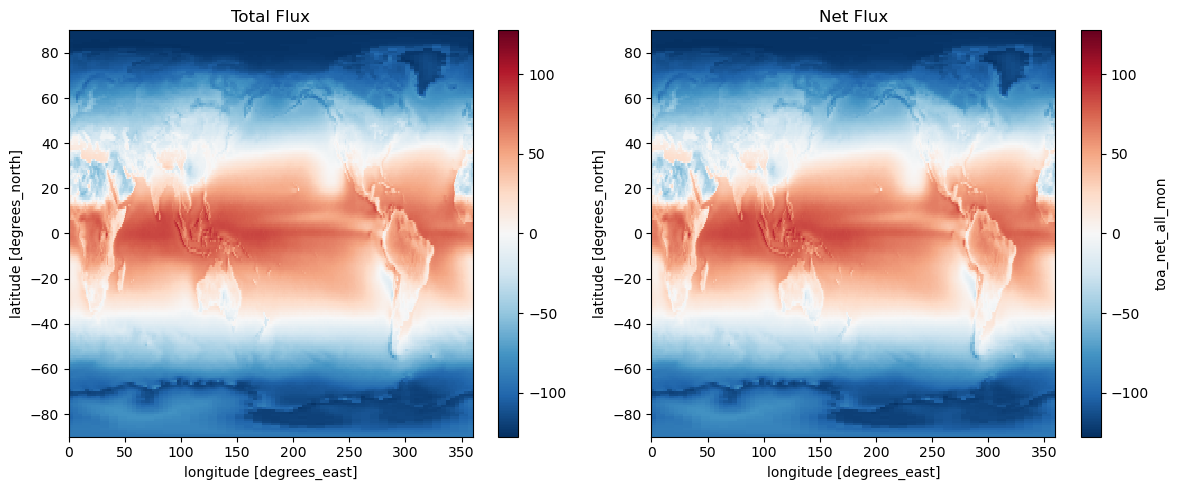

In [8]:
#Add up the three variables and verify visually that they are equivalent to the TOA net flux
total_flux = solar_mean - toa_lw_mean - toa_sw_mean
toa_net = TOA['toa_net_all_mon'].mean(dim='time')

fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(12, 5))
total_flux.plot(ax=ax4)
ax4.set_title('Total Flux')

toa_net.plot(ax=ax5)
ax5.set_title('Net Flux')

plt.tight_layout()
plt.show()

In [9]:
# 2.2
# Calculate and verify TOA incoming solar, outgoing longwave, and outgoing shortwave

weights = np.cos(np.deg2rad(TOA.lat))

toa_incoming_solar = TOA['solar_mon'].weighted(weights).mean(dim=['time','lon','lat']) 
toa_outgoing_lw = TOA['toa_lw_all_mon'].weighted(weights).mean(dim=['time','lon','lat']) 
toa_outgoing_sw = TOA['toa_sw_all_mon'].weighted(weights).mean(dim=['time','lon','lat']) 

print("outgoing longwave:",toa_outgoing_lw.values,'W·m^-2')
print("outgoing shortwave:",toa_outgoing_sw.values,'W·m^-2')
print("incoming solar:",toa_incoming_solar.values,'W·m^-2')

outgoing longwave: 240.26692 W·m^-2
outgoing shortwave: 99.13806 W·m^-2
incoming solar: 340.28326 W·m^-2


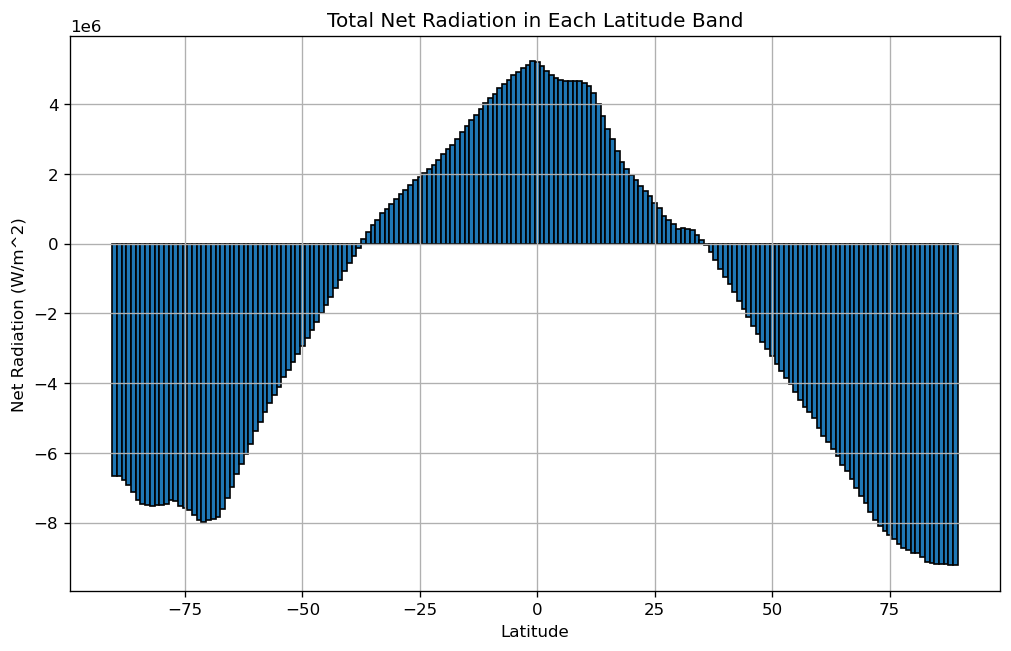

In [10]:
# 2.3 
#I could't handle the questions below, so i asked my academic siblings shiqian Long for help.

latitude = TOA.variables['lat'][:]
net_radiation = TOA.variables['toa_net_all_mon'][:]

# Calculate total net radiation in each 1-degree latitude band
lat_resolution = 1.0
lat_bands = np.arange(-90, 91, lat_resolution)
net_radiation_total = np.zeros(len(lat_bands) - 1)

for i in range(len(lat_bands) - 1):
    lat_min, lat_max = lat_bands[i], lat_bands[i + 1]
    lat_mask = (latitude >= lat_min) & (latitude < lat_max)
    net_radiation_total[i] = np.sum(net_radiation[:, lat_mask])
    

plt.figure(figsize=(10, 6), dpi=120)
plt.bar(lat_bands[:-1], net_radiation_total, width=lat_resolution, edgecolor='black')
plt.title('Total Net Radiation in Each Latitude Band')
plt.xlabel('Latitude')
plt.ylabel('Net Radiation (W/m^2)')
plt.grid(True)
plt.show()

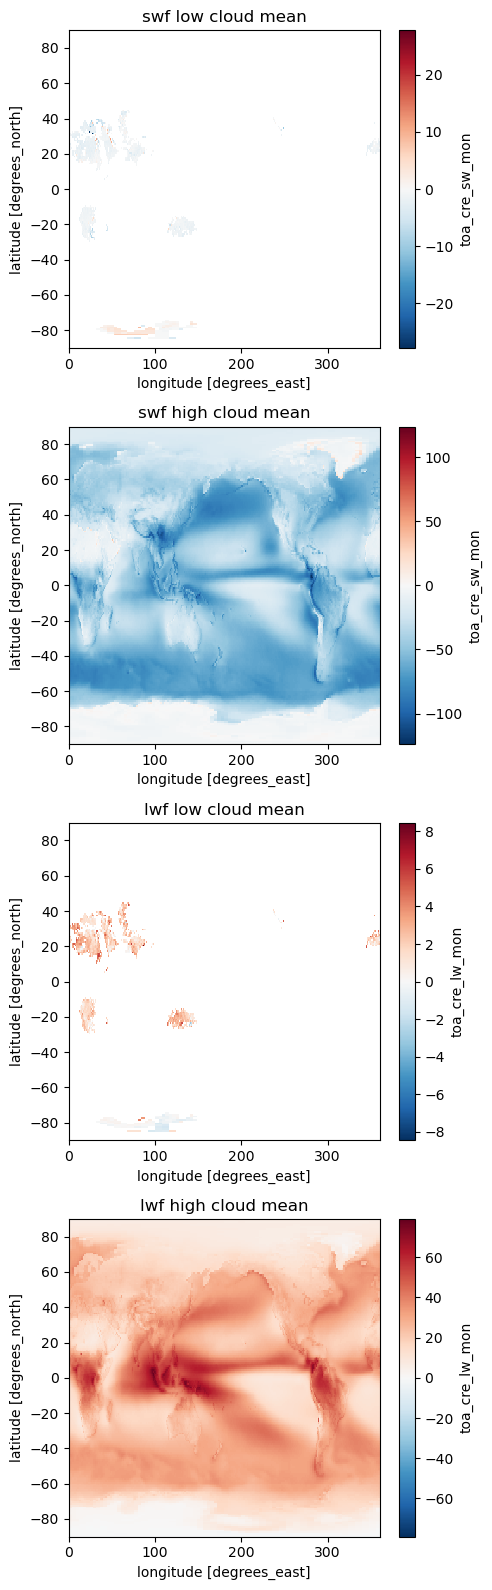

In [11]:
# 2.4
swf = TOA['toa_cre_sw_mon']  # Shortwave radiation flux
lwf = TOA['toa_cre_lw_mon']  # Longwave radiation flux
cld = TOA['cldarea_total_daynight_mon']  # Total cloud area fraction

# Define low and high cloud thresholds
low_cloud_threshold = TOA['cldtau_total_day_mon'].quantile(0.25)
high_cloud_threshold = TOA['cldtau_total_day_mon'].quantile(0.75)

# Calculate time-mean for low and high cloud areas
swf_low_cloud_mean = swf.where(cld<low_cloud_threshold).mean(dim='time')
swf_high_cloud_mean = swf.where(cld>high_cloud_threshold).mean(dim='time')
lwf_low_cloud_mean = lwf.where(cld<low_cloud_threshold).mean(dim='time')
lwf_high_cloud_mean = lwf.where(cld>high_cloud_threshold).mean(dim='time')

# Plot 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(5, 16))
swf_low_cloud_mean.plot(ax=ax1)
ax1.set_title('swf low cloud mean')

swf_high_cloud_mean.plot(ax=ax2)
ax2.set_title('swf high cloud mean')

lwf_low_cloud_mean.plot(ax=ax3)
ax3.set_title('lwf low cloud mean')

lwf_high_cloud_mean.plot(ax=ax4)
ax4.set_title('lwf high cloud mean')

plt.tight_layout()
plt.show()


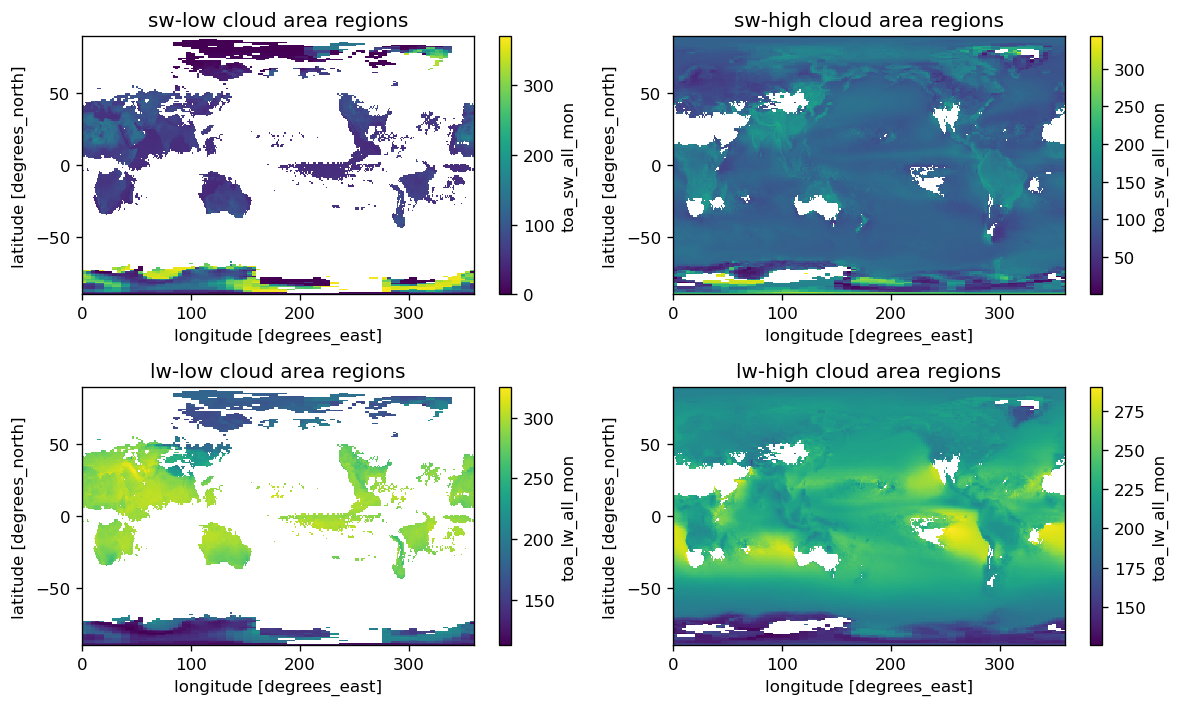

In [12]:
#TA添加
fig = plt.figure(figsize=(10,6), dpi=120)
grid = plt.GridSpec(4, 4)  # 4 rows 4 cols
plt.subplot(grid[0:2, 0:2])
TOA.toa_sw_all_mon.where((TOA.cldarea_total_daynight_mon<=25)).mean(dim='time').plot()
plt.title('sw-low cloud area regions')
plt.subplot(grid[0:2, 2:4])
TOA.toa_sw_all_mon.where((TOA.cldarea_total_daynight_mon>=75)).mean(dim='time').plot()
plt.title('sw-high cloud area regions')
plt.subplot(grid[2:4, 0:2])
TOA.toa_lw_all_mon.where((TOA.cldarea_total_daynight_mon<=25)).mean(dim='time').plot()
plt.title('lw-low cloud area regions')
plt.subplot(grid[2:4, 2:4])
TOA.toa_lw_all_mon.where((TOA.cldarea_total_daynight_mon>=75)).mean(dim='time').plot()
plt.title('lw-high cloud area regions')

plt.tight_layout()

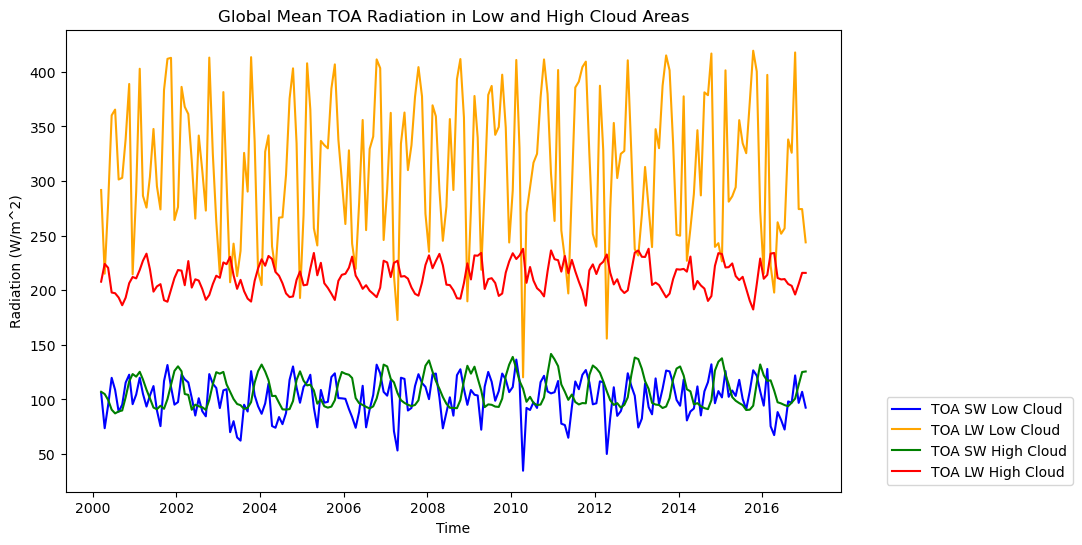

In [19]:
# 2.5
toa_sw_all = TOA['toa_sw_all_mon']
toa_lw_all = TOA['toa_lw_all_mon']
lat = np.radians(toa_sw_all['lat'])
lon = np.radians(toa_sw_all['lon'])

# Calculate area-weighted global mean values for shortwave and longwave radiation in low and high cloud areas
cos_lat = np.cos(lat)
area_weights = cos_lat / cos_lat.mean()

# Define cloud area
cf = TOA['cldarea_total_daynight_mon'] / 100
low_cloud_area = cf <= 0.25
high_cloud_area = cf >= 0.75

global_sw_low_cloud = (toa_sw_all *  area_weights).where(low_cloud_area).mean(dim=['lat', 'lon'])
global_lw_low_cloud = (toa_lw_all *  area_weights).where(low_cloud_area).mean(dim=['lat', 'lon'])

global_sw_high_cloud = (toa_sw_all * area_weights).where(high_cloud_area).mean(dim=['lat', 'lon'])
global_lw_high_cloud = (toa_lw_all * area_weights).where(high_cloud_area).mean(dim=['lat', 'lon'])


plt.figure(figsize=(10, 6))

plt.plot(global_sw_low_cloud['time'], global_sw_low_cloud, label='TOA SW Low Cloud', color='blue')
plt.plot(global_lw_low_cloud['time'], global_lw_low_cloud, label='TOA LW Low Cloud', color='orange')
plt.plot(global_sw_high_cloud['time'], global_sw_high_cloud, label='TOA SW High Cloud', color='green')
plt.plot(global_lw_high_cloud['time'], global_lw_high_cloud, label='TOA LW High Cloud', color='red')

# Set plot title and labels
plt.title('Global Mean TOA Radiation in Low and High Cloud Areas')
plt.xlabel('Time')
plt.ylabel('Radiation (W/m^2)')

plt.legend(loc='lower left',bbox_to_anchor=(1.05, 0))
plt.show()

### 第二题代码运行正常，可以输出结果和图片，报告中也展示了代码思路。第三问计算出otal amount总量，这里面涉及到了计算不同维度下的grid面积，最后辐射强度要跟面积相乘，单位：W。第四问数据筛选错误， low cloud area as ≤25% and high cloud area as ≥75%就是数据中云值小于25和大于75，不用进行分位数筛选。第五问应为第四问出现错误且没有回答What is the overall effect of clouds on shortwave and longwave radiation?
### 得分：27/30
### --------------------------------------------------------------------------------------------

In [22]:
# 3
#Load the netCDF dataset
ds = xr.open_dataset('MERRA2_200.tavgU_2d_aer_Nx.200008.nc4', engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:    (lon: 576, lat: 361, time: 24)
Coordinates:
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * time       (time) datetime64[ns] 2000-08-01T00:30:00 ... 2000-08-01T23:30:00
Data variables: (12/50)
    BCANGSTR   (time, lat, lon) float32 ...
    BCCMASS    (time, lat, lon) float32 ...
    BCEXTTAU   (time, lat, lon) float32 ...
    BCFLUXU    (time, lat, lon) float32 ...
    BCFLUXV    (time, lat, lon) float32 ...
    BCSCATAU   (time, lat, lon) float32 ...
    ...         ...
    SUFLUXU    (time, lat, lon) float32 ...
    SUFLUXV    (time, lat, lon) float32 ...
    SUSCATAU   (time, lat, lon) float32 ...
    TOTANGSTR  (time, lat, lon) float32 ...
    TOTEXTTAU  (time, lat, lon) float32 ...
    TOTSCATAU  (time, lat, lon) float32 ...
Attributes: (12/30)
    History:                           Original file generated: Fri Jun 19 13...
    Filename:                          MERRA2_200.tavgU_2d_aer_Nx.200008.nc4
    Comment:                           GMAO filename: d5124_m2_jan91.tavg1_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    DataResolution:                    0.5 x 0.625
    Source:                            CVS tag: GEOSadas-5_12_4
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/KPUMVXFEQLA1
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000

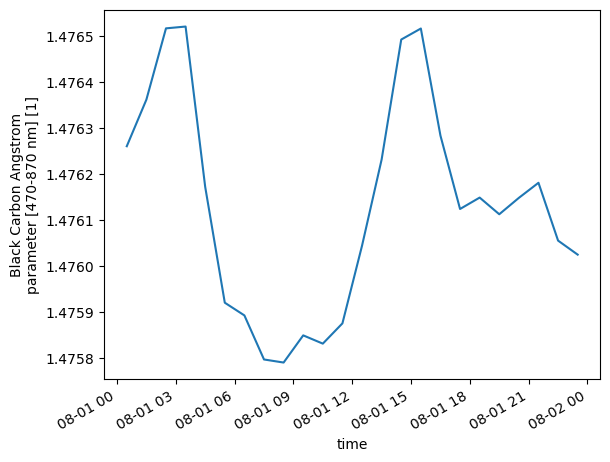

In [33]:
ds_clim=ds.BCANGSTR.groupby("time.month")
ds_clim.mean(dim=['lon','lat']).plot()

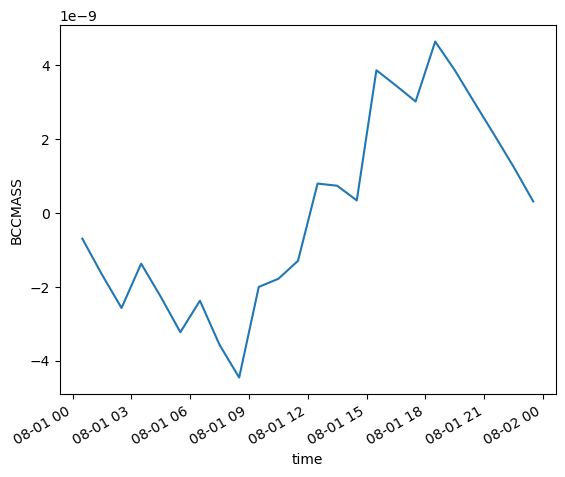

In [31]:
ds_dif=ds_clim-ds_clim.mean(dim='time')
ds_dif.mean(dim=['lon','lat']).plot()

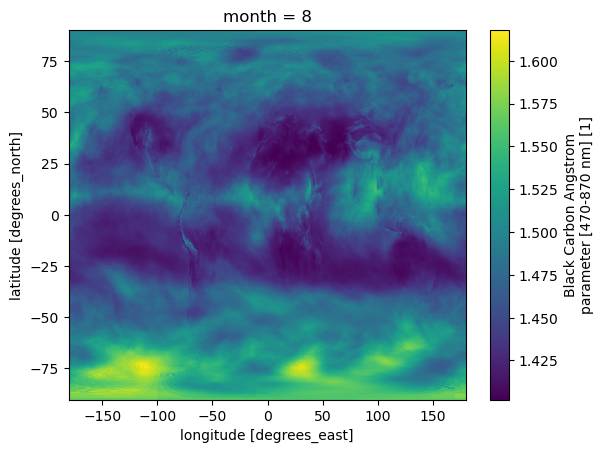

In [25]:
# 3.2
ds1=ds.BCANGSTR.groupby("time.month").mean()
ds1.plot()

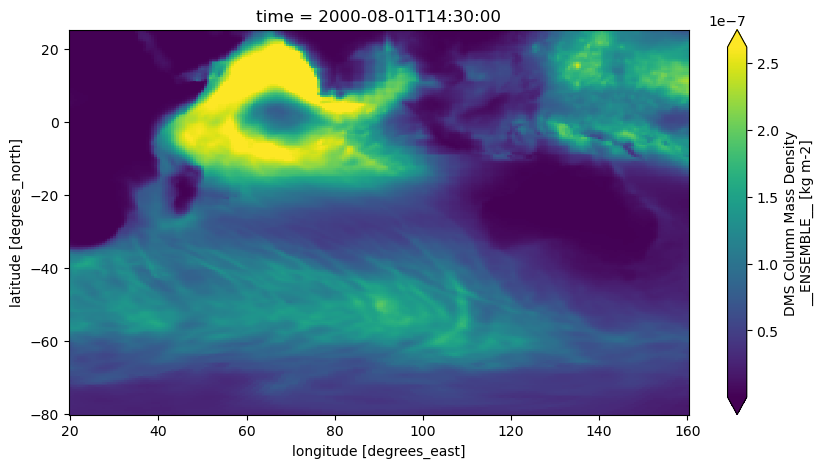

In [26]:
ds.DMSCMASS.isel(time=-10).sel(lon=slice(20, 160), 
                          lat=slice(-80, 25)).plot(robust=True, figsize=(10, 5))

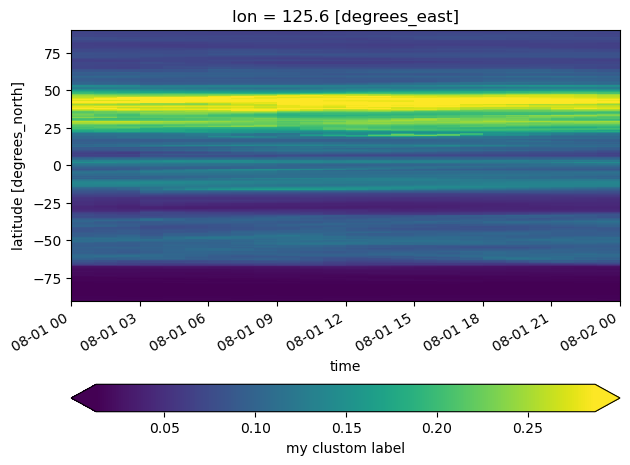

In [27]:
colorbar_kwargs = {
    "orientation": "horizontal",
    "label": "my clustom label",
    "pad": 0.2,
}

ds.TOTSCATAU.sel(lon=125.35, method='nearest').plot(
    x="time", 
    robust=True,  
    cbar_kwargs=colorbar_kwargs,
)

plt.tight_layout()
plt.show()

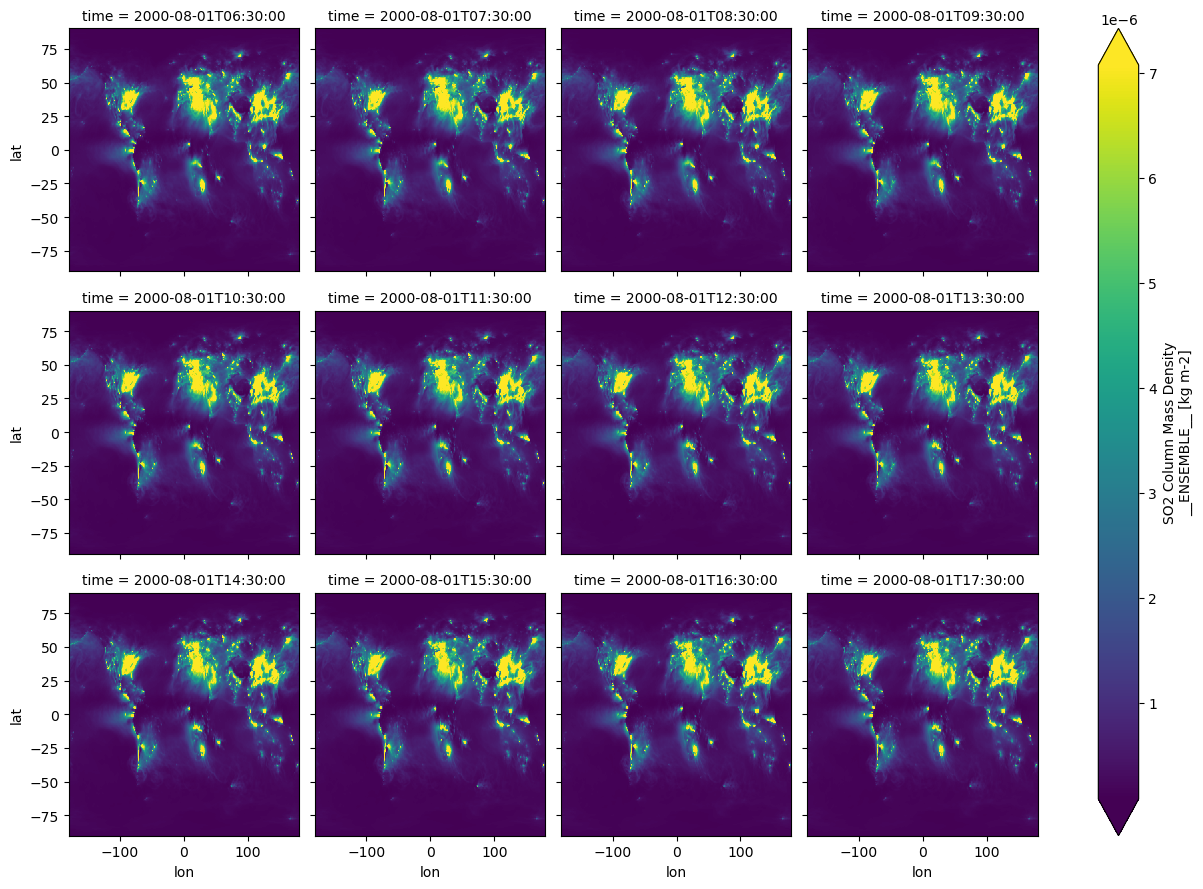

In [28]:
ds.SO2CMASS.sel(time=slice("2000-08-01T06:30:00", "2000-08-01T17:30:00")).plot(col="time", col_wrap=4, robust=True)

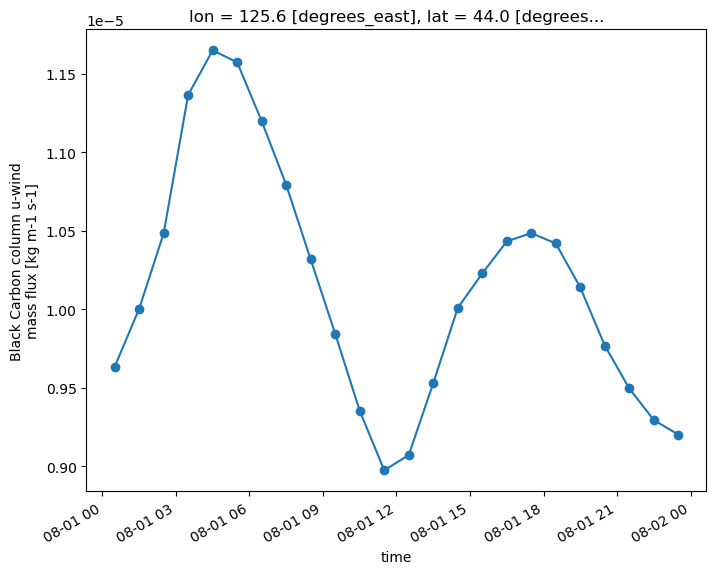

In [29]:
ds.BCFLUXU.sel(lon=125.35, lat=43.88, method='nearest').plot(marker="o", size=6)

### 第三题代码运行正常，可以输出正确结果和图片，报告中也展示了输出内容和结果。
### 得分：10/10
### --------------------------------------------------------------------------------------------